# Exploring Impact of Work Dissatisfaction on Resignments at the TAFE and the DETE

## Table of Contents

1. [**Introduction**](#introduction)
	- Project Description
    - Data Description
2. [**Acquiring and Loading Data**](#loading_data)
3. [**Data Cleaning**](#data_cleaning)
    - Dropping Redundant Columns
    - Renaming Columns
    - Dropping Redundant Rows
    - Calculating DETE Institute Service
    - Counting Dissatisfied Resignments
    - Cleaning Age Columns
    - Cleaning Institute Service Columns
    - Creating Clean TAFE and DETE datasets
    - Combining Datasets¶
4. [**Data Analysis & Visualization**](#analysis)
    - Resignations Due to Dissatisfaction by Career Stage
    - Resignations Due to Dissatisfaction by Age Group
    - Exploring Resignations Separately for TAFE and DETE Institutes
5. [**Conclusion**](#conclusion)

<a id='introduction'></a>
# Introduction

<div>
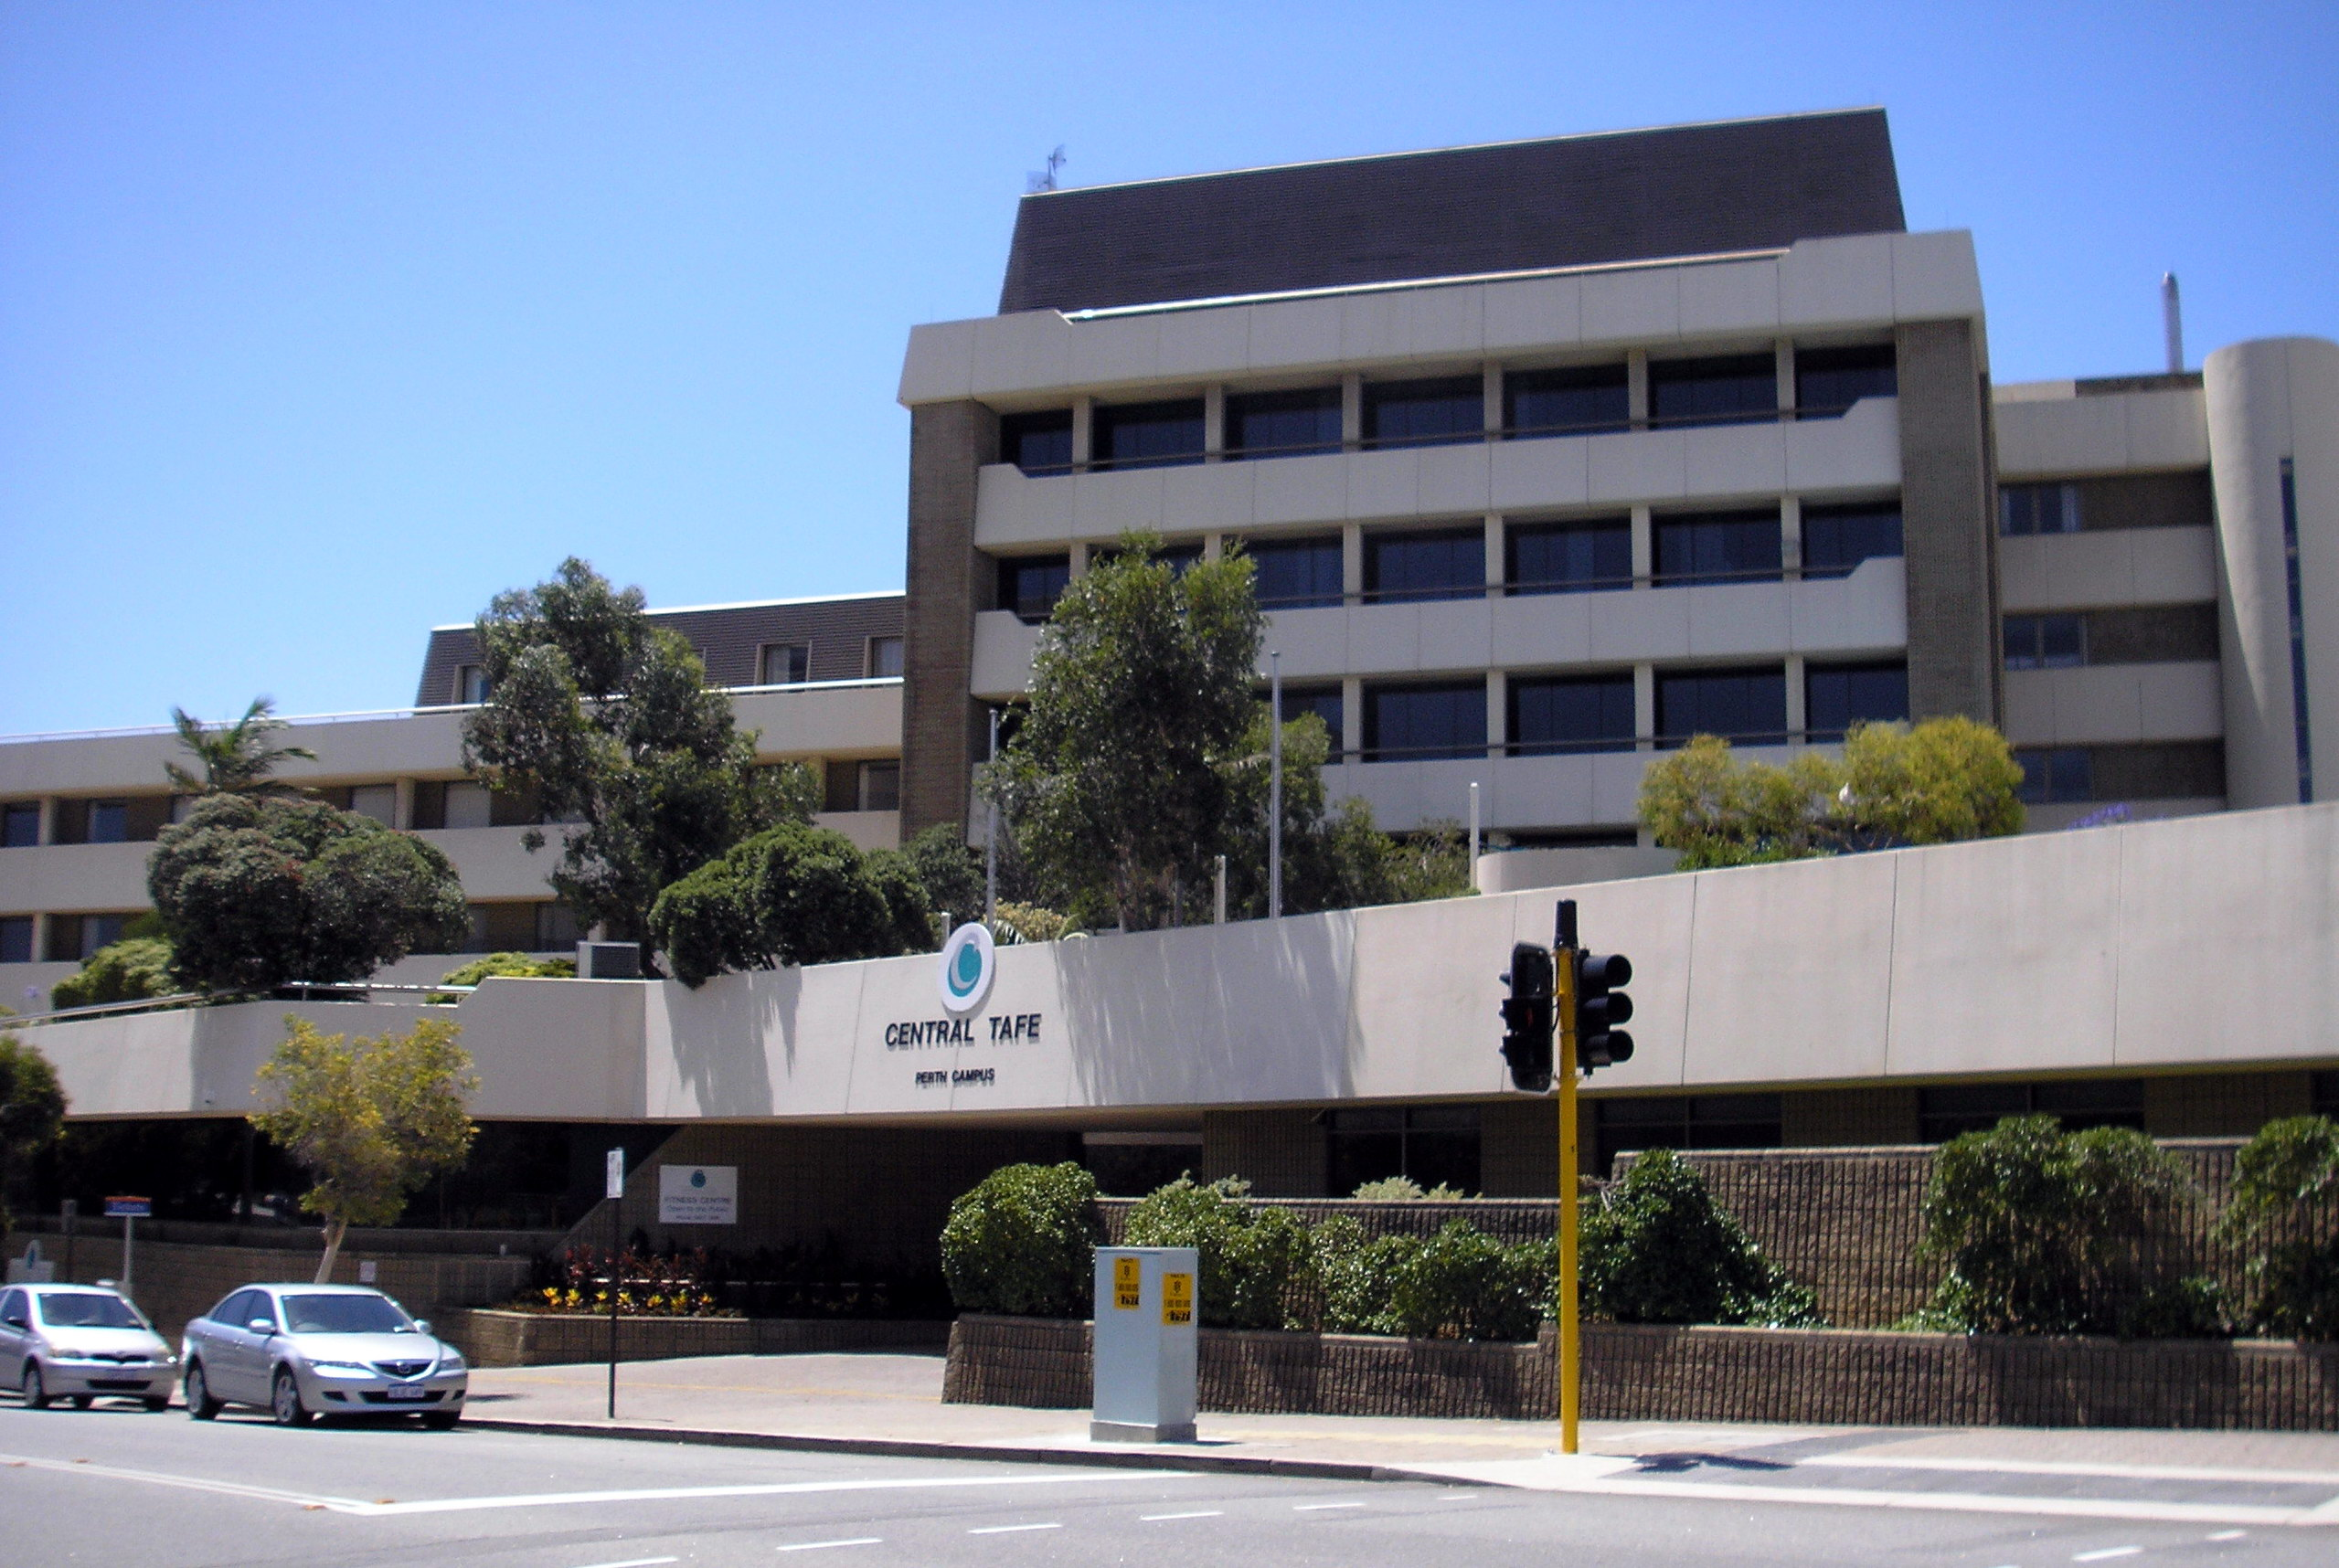
</div>

**Goal/Purpose:** The main goal of this project is to explore exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute to answer the following questions:

- Are employees who only work for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

**Approach Taken/Methodology:** To achieve our goal we are going to clean our datasets, merge them together and explore it using charts.

**Results:** One of our findings during the project was that 50% of employees who had worked at TAFE and DETE for more than 6 years resigned due to dissatisfaction.

### Data Description
**Content:** These datasets contain exit surveys of employees from DETE and TAFE institute in Queensland, Australia.

Below is a preview of a couple columns we'll work with from the `dete_survey.csv`:

- `ID`: An id used to identify the participant of the survey
- `SeparationType`: The reason why the person's employment ended
- `Cease Date`: The year or month the person's employment ended
- `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the `tafe_survey.csv`:

- `Record ID`: An id used to identify the participant of the survey
- `Reason for ceasing employment`: The reason why the person's employment ended
- `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

<a id='loading_data'></a>
# Acquiring and Loading Data

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

Our starting point is to read two files and look at them more closely.

In [2]:
tafe = pd.read_csv('C:/Users/feelingcxld Study/my_datasets/tafe_survey.csv')
dete = pd.read_csv('C:/Users/feelingcxld Study/my_datasets/dete_survey.csv', na_values='Not Stated')

Here's **TAFE exit survey** dataset.

In [3]:
tafe

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,Yes,Yes,Yes,Yes,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2
700,6.350712e+17,Southbank Institute of Technology,Non-Delivery (corporate),2013.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,No,No,Yes,No,Female,41 45,Temporary Full-time,Professional Officer (PO),1-2,1-2


Let's take a look at the information about this dataset.

In [4]:
tafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

As we can see, we have many columns here. We also have many empty data in these columns. For example let's look at the `Contributing Factors. Dissatisfaction` column.

In [5]:
tafe['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         371
NaN                                       265
Contributing Factors. Dissatisfaction      66
Name: Contributing Factors. Dissatisfaction, dtype: int64

We have 265 empty entries in this column. We will handle this later on.

Let's explore some more columns that we'll use in our analysis later on.

In [6]:
tafe['Reason for ceasing employment'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: Reason for ceasing employment, dtype: int64

In [7]:
tafe['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      360
NaN                    265
Job Dissatisfaction     77
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [8]:
tafe['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts(dropna=False)

Less than 1 year      147
NaN                   106
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: int64

In [9]:
tafe['CurrentAge. Current Age'].value_counts(dropna=False)

56 or older      162
NaN              106
51-55             82
41  45            80
46  50            59
31  35            52
36  40            51
26  30            50
21  25            44
20 or younger     16
Name: CurrentAge. Current Age, dtype: int64

We have many empty entries in these columns too. We'll also need to do some stylistical changes in these columns. 

For now, let's take a look at the **DETE exit survey** dataset.

In [10]:
dete

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,Age Retirement,02/2014,1977.0,1999.0,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,A,A,SA,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980.0,1980.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,N,N,N,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,A,N,A,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001.0,2009.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,A,N,A,Female,41-45,NaN,NaN,NaN,NaN,NaN


We can see that this dataset has `NaN` values too. Let's explore the information about this dataset.

In [11]:
dete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In this dataset we have less missing entries compared to TAFE dataset.

Let's take a look at some columns that we'll use for our analysis.

In [12]:
dete['SeparationType'].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [13]:
dete['Cease Date'].value_counts(dropna=False)

2012       344
2013       200
01/2014     43
12/2013     40
NaN         34
09/2013     34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
04/2014      2
07/2014      2
08/2012      2
04/2013      2
02/2014      2
11/2012      1
09/2010      1
2010         1
2014         1
07/2012      1
09/2014      1
07/2006      1
Name: Cease Date, dtype: int64

In [14]:
dete['DETE Start Date'].value_counts(dropna=False).sort_index()

1963.0     4
1965.0     1
1966.0     1
1967.0     2
1968.0     3
1969.0    10
1970.0    21
1971.0    10
1972.0    12
1973.0     8
1974.0    14
1975.0    21
1976.0    15
1977.0    11
1978.0    15
1979.0    14
1980.0    14
1981.0     9
1982.0     4
1983.0     9
1984.0    10
1985.0     8
1986.0    12
1987.0     7
1988.0    15
1989.0    17
1990.0    20
1991.0    18
1992.0    18
1993.0    13
1994.0    10
1995.0    14
1996.0    19
1997.0    14
1998.0    14
1999.0    19
2000.0    18
2001.0    10
2002.0    15
2003.0    15
2004.0    18
2005.0    20
2006.0    23
2007.0    34
2008.0    31
2009.0    24
2010.0    27
2011.0    40
2012.0    27
2013.0    21
NaN       73
Name: DETE Start Date, dtype: int64

In [15]:
dete['Job dissatisfaction'].value_counts(dropna=False)

False    733
True      89
Name: Job dissatisfaction, dtype: int64

In [16]:
dete['Age'].value_counts(dropna=False)

61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
NaN               11
20 or younger      1
Name: Age, dtype: int64

Here's also many empty entries that we'll have to handle later on. We also need to extract only *Resignation* part from values in `SeparationType` column.

<a id='data_cleaning'></a>
# Data Cleaning

## Dropping Redundant Columns

For our first step we are going to drop columns that will be worthless for our analysis.

In [17]:
# Dropping rows in TAFE dataset by index
tafe_updated = tafe.drop(tafe.columns[16:66], axis=1)
tafe_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 22 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

In [18]:
# Dropping columns in DETE dataset by index
dete_updated = dete.drop(dete.columns[28:49], axis=1)
dete_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

There are still columns here that we're not going to use, but we'll get rid of them a little later.

## Renaming Columns

Now, we have to rename some columns because we will combine these datasets together. We need to make sure that the necessary columns are not separated after the merge.

Here's the list of the column names for the DETE dataset.

In [19]:
dete_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

Below are the new columns that we will use as an example for the columns in the TAFE dataset.

In [20]:
# Replacing spaces between column names with -, and converting all letters to lowercase in DETE dataset
dete_updated.columns = dete_updated.columns.str.lower().str.replace(' ', '_')
dete_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   822 non-null    int64  
 1   separationtype                       822 non-null    object 
 2   cease_date                           788 non-null    object 
 3   dete_start_date                      749 non-null    float64
 4   role_start_date                      724 non-null    float64
 5   position                             817 non-null    object 
 6   classification                       455 non-null    object 
 7   region                               717 non-null    object 
 8   business_unit                        126 non-null    object 
 9   employment_status                    817 non-null    object 
 10  career_move_to_public_sector         822 non-null    bool   
 11  career_move_to_private_sector   

Here's the list of the column names for the TAFE dataset.

In [21]:
tafe_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Gender. What is your Gender?',
       'CurrentAge. Current Age', 'Employment Type. Employment Type',
       'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='object')

Since we don't need all the columns, we will only rename some important ones and leave the rest as is.

In [22]:
# Applying column names map to TAFE columns
rename_col_map = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype',
                  'Employment Type. Employment Type': 'position', 'Classification. Classification': 'classification',
                  'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                  'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service',
                  'CurrentAge. Current Age': 'age', 'Gender. What is your Gender?': 'gender'
                 }
tafe_updated = tafe_updated.rename(rename_col_map, axis=1)
tafe_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 22 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   702 non-null    float64
 1   Institute                                            702 non-null    object 
 2   WorkArea                                             702 non-null    object 
 3   cease_date                                           695 non-null    float64
 4   separationtype                                       701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   437 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  437 non-null    object 
 8   Contributing Factors. Ill Health                     437 non-null    o

Above, we can see the new columns.

## Dropping Redundant Rows

For our next step we need to drop redundant rows.

For our analysis we only need rows with *Resignation* entries in `separationtype` column in both TAFE and DETE datasets.

In [23]:
print('TAFE dataset:\n', tafe_updated['separationtype'].value_counts(dropna=False))
print('\nDETE dataset:\n', dete_updated['separationtype'].value_counts(dropna=False))

TAFE dataset:
 Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

DETE dataset:
 Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


In the DETE dataset we have three different types of resignation *Resignation-Move overseas/interstate*, *Resignation-Other employer* and *Resignation-Other reasons*. We can drop parts after ' - ' and leave only with *Resignation*.

In [24]:
# Extract 'Resignation' word in 'separationtype' column in DETE dataset
dete_updated['separationtype'] = dete_updated['separationtype'].str.split('-').str[0]
dete_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

Now, we are ready to drop unnecessary rows.

In [25]:
# Create a copy of the TAFE dataset containing only `Resignation` in `separationtype` column in a new variable
tafe_resigned = tafe_updated[tafe_updated['separationtype'] == 'Resignation'].copy()
tafe_resigned.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,gender,age,position,classification,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,-,Travel,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,-,Other,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,-,Other,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,-,Other,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [26]:
tafe_resigned['separationtype'].value_counts(dropna=False)

Resignation    340
Name: separationtype, dtype: int64

In TAFE dataset we have 340 `Resignation` entries.

In [27]:
# Creating a copy of the DETE dataset containing only `Resignation` in `separationtype` column in a new variable
dete_resigned = dete_updated[dete_updated['separationtype'] == 'Resignation'].copy()
dete_resigned.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [28]:
dete_resigned['separationtype'].value_counts(dropna=False)

Resignation    311
Name: separationtype, dtype: int64

In DETE dataset we have 311 `Resignation` entries.

## Calculating DETE Institute Service

If we take a look at the TAFE dateset columns one more time we will notice `institute_service` column.

In [29]:
tafe_resigned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 22 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

In [30]:
tafe_resigned['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In this column, we have data about how long employee has worked here.

As alternative, in DETE dataset we have `dete_start_date` and `cease_date` columns. We can calculate how long employee has worked at the DETE and put that data in a new column.

In [31]:
dete_resigned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    object 
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

Let's take a look at the `cease_date` and `dete_start_date` columns.

In [32]:
dete_resigned['cease_date'].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
07/2012      1
2010         1
07/2006      1
Name: cease_date, dtype: int64

We can see here that some entries have month alongside with year.

In [33]:
dete_resigned['dete_start_date'].value_counts(dropna=False)

NaN       28
2011.0    24
2008.0    22
2012.0    21
2007.0    21
2010.0    17
2005.0    15
2004.0    14
2006.0    13
2009.0    13
2013.0    10
2000.0     9
1999.0     8
1994.0     6
2003.0     6
1992.0     6
1996.0     6
1998.0     6
2002.0     6
1990.0     5
1997.0     5
1980.0     5
1993.0     5
1989.0     4
1991.0     4
1988.0     4
1995.0     4
1986.0     3
2001.0     3
1985.0     3
1983.0     2
1976.0     2
1974.0     2
1975.0     1
1984.0     1
1971.0     1
1982.0     1
1972.0     1
1963.0     1
1977.0     1
1973.0     1
1987.0     1
Name: dete_start_date, dtype: int64

For the `dete_start_date` column we have only 22 `NaN` entires. All the other data is good for the calculations.

But before start our calculations we need to remove months in `cease_date` column. We also need to convert `datatype` to `float`.

In [34]:
# In DETE dataset, extract the year from the `cease_date` column and covert the value to float
dete_resigned['cease_date'] = dete_resigned['cease_date'].str.split('/').str[-1].astype(float)
dete_resigned['cease_date'].value_counts(dropna=False)

2013.0    146
2012.0    129
2014.0     22
NaN        11
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

Below, we can see a new column in DETE dataset `institute_service` with many entries in it. It is quite different from the `institute_service` column in the TAFE dataset, but we don't have to worry about that.

In [35]:
# Subtract `dete_start_date` from `cease_date` and store the values in the new `institute_service` column in DETE dataset
dete_resigned['institute_service'] = dete_resigned['cease_date'] - dete_resigned['dete_start_date']
dete_resigned['institute_service'].value_counts(dropna=False)

NaN     38
5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
17.0     6
10.0     6
22.0     6
14.0     6
12.0     6
18.0     5
16.0     5
24.0     4
11.0     4
23.0     4
21.0     3
19.0     3
39.0     3
32.0     3
25.0     2
28.0     2
26.0     2
36.0     2
30.0     2
34.0     1
29.0     1
27.0     1
42.0     1
33.0     1
41.0     1
49.0     1
35.0     1
38.0     1
31.0     1
Name: institute_service, dtype: int64

## Counting Dissatisfied Resignments

Now, we are going to split resignments in two groups - satisfied and dissatisfied.

In the TAFE dataset, we have two columns that we can use to find out if an employee resigns due to dissatisfaction. The first column is `Contributing Factors. Dissatisfaction` and the second column is `Contributing Factors. Job Dissatisfaction`.

In [36]:
tafe_resigned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 22 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

Let's look at the values in these two columns.

In [37]:
print(tafe_resigned['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print(tafe_resigned['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


We have three different values in these two columns *Contributing Factors. Dissatisfaction*, *Job Dissatisfaction* and ' - '. We will convert these values to more readable `True` and `False` values. For `True` values we will use *Contributing Factors. Dissatisfaction* and *Job Dissatisfaction* enties. For `False` values we will use ' - ' entries.

In [38]:
# Function that converts null values to NaN, `-` symbol to `False` and all other values to `True`
def update_val(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [39]:
tafe_resigned[tafe_resigned.columns[10:12]] = tafe_resigned[tafe_resigned.columns[10:12]].applymap(update_val)
print(tafe_resigned['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print(tafe_resigned['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64
False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


Now we have only `True` and `False` values in `Contributing Factors. Dissatisfaction` and `Contributing Factors. Job Dissatisfaction` columns. 

Let's create new column `dissatisfied`. Here we will store data on whether dissatisfaction was the reason for resignation. To do so, we will look at the two columns `Contributing Factors. Dissatisfaction` and `Contributing Factors. Job Dissatisfaction`, if either of these two columns is `True` we will store `True` in `dissatisfied` column. In other case, we will store `False`.

In [40]:
# Store `True` and `False` values in a new column `dissatisfied` based on 10 and 11 columns in TAFE dataset
tafe_resigned['dissatisfied'] = tafe_resigned[tafe_resigned.columns[10:12]].any(axis=1, skipna=False)
tafe_resigned_up = tafe_resigned.copy()
tafe_resigned_up['dissatisfied'].value_counts(dropna=False)

False    241
True      99
Name: dissatisfied, dtype: int64

After our manipulation with the data, we have 99 employees who resigned due to dissatisfaction and 241 employees who resigned for other reasons.

Now, let's split resignments for DETE dataset.

In [41]:
dete_resigned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    float64
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

Here we have many more columns to work with compared to the TAFE dataset. We will use `job_dissatisfaction`, `dissatisfaction_with_the_department`, `physical_work_environment`, `lack_of_recognition`, `lack_of_job_security`, `work_location`, `employment_conditions`, `work_life_balance` and `workload` columns. They are already `bool` `datatype`. It mean that they store only `True` or `False` values. We can look at one of the columns to confirm this.

In [42]:
dete_resigned['job_dissatisfaction'].value_counts(dropna=False)

False    270
True      41
Name: job_dissatisfaction, dtype: int64

Now, let's create `dissatisfied` column and store data on whether dissatisfaction was the reason for resignation.

In [43]:
# Store `True` and `False` values in a new column `dissatisfied` based on columns 13, 14, 15, 16, 17, 18, 19, 25 and 26 in DETE dataset
dete_resigned['dissatisfied'] = dete_resigned.iloc[:, [13,14,15,16,17,18,19,25,26]].any(axis=1, skipna=False)
dete_resigned_up = dete_resigned.copy()
dete_resigned_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

After our manipulation with the data, we have 149 employees who resigned due to dissatisfaction and 162 employees who resigned for other reasons.

## Cleaning Age Columns

One of the questions that we'll have to answer is 'Are younger employees resigning due to some kind of dissatisfaction?'. So we need to look at the `age` columns for both TAFE and DETE datasets. Let's take a look at the values in these columns.

In [44]:
print('TAFE dataset:\n', tafe_resigned_up['age'].value_counts(dropna=False))
print('\nDETE dataset:\n', dete_resigned_up['age'].value_counts(dropna=False))

TAFE dataset:
 NaN              50
41  45           45
46  50           39
51-55            39
21  25           33
36  40           32
31  35           32
26  30           32
56 or older      29
20 or younger     9
Name: age, dtype: int64

DETE dataset:
 41-45            48
46-50            42
36-40            41
26-30            35
51-55            32
31-35            29
21-25            29
56-60            26
61 or older      23
NaN               5
20 or younger     1
Name: age, dtype: int64


We can see that these columns different from each other. In TAFE dataset, there are whitespaces between numbers and also *56 or older* values. In DETE dataset we have *61 or older* values that not in TAFE dataset. We have to change this.

Let's start with TAFE dataset. We need to remove whitespaces between numbers and place ' - ' instead.

In [45]:
# Convert spaces between ages with -
tafe_resigned_up['age'] = tafe_resigned_up['age'].str.replace(r'\s+', '-', regex=True).str.replace('-or-', ' or ')
tafe_resigned_up['age'].value_counts(dropna=False)

NaN              50
41-45            45
46-50            39
51-55            39
21-25            33
36-40            32
31-35            32
26-30            32
56 or older      29
20 or younger     9
Name: age, dtype: int64

Now our values in TAFE dataset looks a lot better.

Let's continue our cleaning. For DETE dataset we already have ' - ' between numbers. All that we need to change is *56-60* and *61 or older* entries. We will change them in *56 or older* values so we have same values in both TAFE and DETE datasets.

In [46]:
# Convert `56-60` and `61 or older` ages to `56 or older`
dete_resigned_up['age'] = dete_resigned_up['age'].str.replace('61 or older', '56 or older').str.replace('56-60', '56 or older')
dete_resigned_up['age'].value_counts(dropna=False)

56 or older      49
41-45            48
46-50            42
36-40            41
26-30            35
51-55            32
31-35            29
21-25            29
NaN               5
20 or younger     1
Name: age, dtype: int64

## Cleaning Institute Service Columns

Our next step is to clean `institute service` for both TAFE and DETE datasets.

Here's `institute_service` column in TAFE dataset.

In [47]:
tafe_resigned_up['institute_service'].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

Here we have many groups like *1-2*, *2-3*, *11-20* etc.

Now, let's take a look at the `institute_service` column in DETE dataset.

In [48]:
dete_resigned_up['institute_service'].value_counts(dropna=False)

NaN     38
5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
17.0     6
10.0     6
22.0     6
14.0     6
12.0     6
18.0     5
16.0     5
24.0     4
11.0     4
23.0     4
21.0     3
19.0     3
39.0     3
32.0     3
25.0     2
28.0     2
26.0     2
36.0     2
30.0     2
34.0     1
29.0     1
27.0     1
42.0     1
33.0     1
41.0     1
49.0     1
35.0     1
38.0     1
31.0     1
Name: institute_service, dtype: int64

Here we have many years without groups.

To clean these two columns we'll create new column `service_cat` and split values into 4 categories. *New* for employees who worked less than 3 years at a company. *Experienced* for employees who worked 3-6 years at a company. *Established* for employees who worked 7-10 years at a company. *Veteran* for employees who worked 11 or more years at a company.

But first, we have to extract numbers from `institute_service` column in TAFE dataset and convert it to `float`.

In [49]:
tafe_resigned_up['institute_service'] = tafe_resigned_up['institute_service'].str.extract(r'(\d+)').astype(float)

Now we are ready to create `service_cat` column and store values here.

In [50]:
# Convert integer value to category based on condition
def year_to_career_stage_map(year):
    if pd.isnull(year):
        return np.nan
    elif year < 3:
        return 'New'
    elif year < 7:
        return 'Experienced'
    elif year < 11:
        return 'Established'
    else:
        return 'Veteran'

In [51]:
tafe_resigned_up['service_cat'] = tafe_resigned_up['institute_service'].apply(year_to_career_stage_map)
dete_resigned_up['service_cat'] = dete_resigned_up['institute_service'].apply(year_to_career_stage_map)

In [52]:
print('TAFE dataset:\n', tafe_resigned_up['service_cat'].value_counts(dropna=False))
print('\nDETE dataset:\n', dete_resigned_up['service_cat'].value_counts(dropna=False))

TAFE dataset:
 New            137
Experienced     96
NaN             50
Veteran         36
Established     21
Name: service_cat, dtype: int64

DETE dataset:
 Veteran        100
Experienced     76
New             56
Established     41
NaN             38
Name: service_cat, dtype: int64


After our manipulations with the data we can see the following results:

In TAFE dataset we have 137 *New* employees, 96 *Experienced* employees, 21 *Established* employees and 36 *Veteran* employees.

In DETE dataset we have 56 *New* employees, 76 *Experienced* employees, 41 *Established* employees and 100 *Veteran* employees.

## Creating Clean TAFE and DETE datasets

In this section, we will make final changes to the original datasets. We will remove the remaining redundant columns, as well as rows with empty values.

Let's take a look at the TAFE dataset information again to refresh our memory.

In [53]:
tafe_resigned_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

We will drop columns starting from `Contributing Factors. Career Move - Public Sector` all the way up to `Contributing Factors. Other`. We also drop all rows that contain empty values in any of the `age` or `service_cat` columns.

In [54]:
# Create a copy of the TAFE dataset in a new variable
tafe_resigned_clean = tafe_resigned_up.copy()
# Drop columns by index
tafe_resigned_clean = tafe_resigned_up.drop(tafe_resigned_up.columns[5:16], axis=1)
# Drop rows if any value in `age` and `service_cat` column is NaN
tafe_resigned_clean = tafe_resigned_clean.dropna(axis=0, subset=['age', 'service_cat'], how='any')
tafe_resigned_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 4 to 701
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 290 non-null    float64
 1   Institute          290 non-null    object 
 2   WorkArea           290 non-null    object 
 3   cease_date         288 non-null    float64
 4   separationtype     290 non-null    object 
 5   gender             290 non-null    object 
 6   age                290 non-null    object 
 7   position           290 non-null    object 
 8   classification     290 non-null    object 
 9   institute_service  290 non-null    float64
 10  role_service       290 non-null    object 
 11  dissatisfied       290 non-null    bool   
 12  service_cat        290 non-null    object 
dtypes: bool(1), float64(3), object(9)
memory usage: 29.7+ KB


After cleaning, we are left with 290 entries in all columns. We lost about 14% of the data, but this will not have much effect on the results of our analysis in the future.

Now, let's complete all the steps above again but for DETE dataset.

In [55]:
dete_resigned_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    float64
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

In this dataset, we will drop columns starting from `role_start_date` all the way up to `none_of_the_above`. And also we drop columns starting from `aboriginal` up to `nesb`.

We also drop all rows with empty values in any of the `age` or `service_cat` columns.

In [56]:
# Create a copy of the DETE dataset
dete_resigned_clean = dete_resigned_up.copy()
# Drop columns by index
dete_resigned_clean = dete_resigned_clean.drop(dete_resigned_clean.columns[4:28], axis=1)
dete_resigned_clean = dete_resigned_clean.drop(dete_resigned_clean.columns[6:11], axis=1)
# Drop rows if any value in `age` and `service_cat` column is NaN
dete_resigned_clean = dete_resigned_clean.dropna(axis=0, subset=['age', 'service_cat'], how='any')
dete_resigned_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 3 to 819
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 271 non-null    int64  
 1   separationtype     271 non-null    object 
 2   cease_date         271 non-null    float64
 3   dete_start_date    271 non-null    float64
 4   gender             266 non-null    object 
 5   age                271 non-null    object 
 6   institute_service  271 non-null    float64
 7   dissatisfied       271 non-null    bool   
 8   service_cat        271 non-null    object 
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 19.3+ KB


In the DETE dataset, after cleaning, we have 271 entries in all columns except the `gender` column. Here we also lose about 14% of the data, but it still won't affect our analysis much.

## Combining Datasets

For the final step we have to combine two datasets together. Let's first create `institute` column for both DETE and TAFE dataset with the values `TAFE` and `DETE` to avoid confusion in the merged dataset.

In [57]:
# Create new column `institute` with `DETE` or `TAFE` value based on institute
dete_resigned_clean['institute'] = 'DETE'
tafe_resigned_clean['institute'] = 'TAFE'

And now, let's merge two datasets together.

In [58]:
combined = pd.concat([dete_resigned_clean, tafe_resigned_clean], ignore_index=True)
combined

,id,separationtype,cease_date,dete_start_date,gender,age,institute_service,dissatisfied,service_cat,institute,Institute,WorkArea,position,classification,role_service
0,4.000000e+00,Resignation,2012.0,2005.0,Female,36-40,7.0,False,Established,DETE,NaN,NaN,NaN,NaN,NaN
1,6.000000e+00,Resignation,2012.0,1994.0,Female,41-45,18.0,True,Veteran,DETE,NaN,NaN,NaN,NaN,NaN
2,9.000000e+00,Resignation,2012.0,2009.0,Female,31-35,3.0,False,Experienced,DETE,NaN,NaN,NaN,NaN,NaN
3,1.000000e+01,Resignation,2012.0,1997.0,Female,46-50,15.0,True,Veteran,DETE,NaN,NaN,NaN,NaN,NaN
4,1.200000e+01,Resignation,2012.0,2009.0,Male,31-35,3.0,False,Experienced,DETE,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,6.350599e+17,Resignation,2013.0,NaN,Female,26-30,1.0,False,New,TAFE,Tropical North Institute of TAFE,Non-Delivery (corporate),Temporary Full-time,Administration (AO),1-2
557,6.350660e+17,Resignation,2013.0,NaN,Male,21-25,5.0,False,Experienced,TAFE,Southern Queensland Institute of TAFE,Non-Delivery (corporate),Temporary Full-time,Operational (OO),5-6
558,6.350668e+17,Resignation,2013.0,NaN,Male,51-55,1.0,False,New,TAFE,Barrier Reef Institute of TAFE,Delivery (teaching),Temporary Full-time,Teacher (including LVT),1-2
559,6.350704e+17,Resignation,2013.0,NaN,Female,51-55,5.0,False,Experienced,TAFE,Tropical North Institute of TAFE,Delivery (teaching),Permanent Full-time,Teacher (including LVT),1-2


To make the merged dataset cleaner, let's drop all the columns with less then 500 filled entries.

In [59]:
# Drop all rows with less than 500 non-null values and store a copy of that dataset in a new variable
combined_cleaned = combined.dropna(thresh=500, axis=1).copy()
combined_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 561 non-null    float64
 1   separationtype     561 non-null    object 
 2   cease_date         559 non-null    float64
 3   gender             556 non-null    object 
 4   age                561 non-null    object 
 5   institute_service  561 non-null    float64
 6   dissatisfied       561 non-null    bool   
 7   service_cat        561 non-null    object 
 8   institute          561 non-null    object 
dtypes: bool(1), float64(3), object(5)
memory usage: 35.7+ KB


Now our dataset clean and ready for analysis.

<a id='analysis'></a>
# Data Analysis & Visualization

## Resignations Due to Dissatisfaction by Career Stage

The first question we want to answer is: Are employees who only work for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

To answer this question let's take a look at the chart below.

In [60]:
# Calculate mean value of dissatisfied employees grouped by service category
service_cat_pivot = combined_cleaned.pivot_table('dissatisfied', 'service_cat')

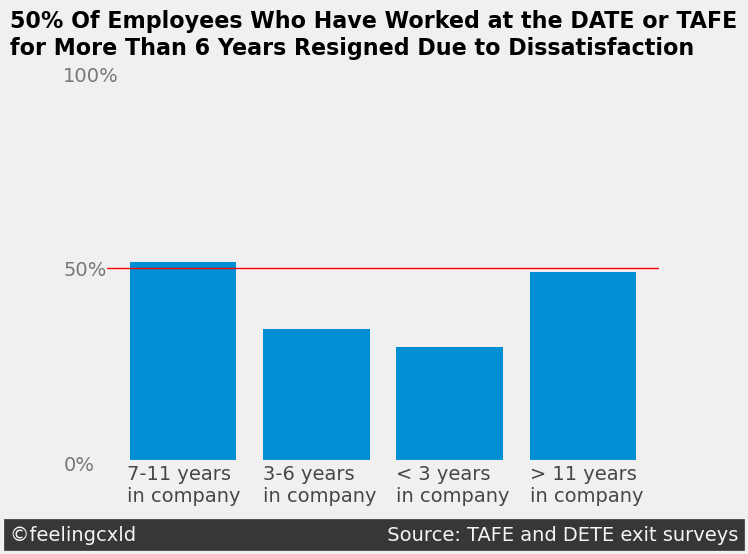

In [61]:
style.use('fivethirtyeight')

fig, ax = plt.subplots()
ax.bar(service_cat_pivot.index, service_cat_pivot['dissatisfied'])

# Title
ax.text(-1.3, 1.05, '50% Of Employees Who Have Worked at the DATE or TAFE\nfor More Than 6 Years Resigned Due to Dissatisfaction',
        fontsize=16, fontweight='bold')

ax.grid(visible=False)

# y ticks
ax.set_ylim(0,1)

ax.set_yticklabels([])
ax.text(-0.9, -0.02, '0%', alpha=0.5)
ax.text(-0.9, 0.48, '50%', alpha=0.5)
ax.text(-0.9, 0.98, '100%', alpha=0.5)

# x ticks
ax.set_xticklabels([])
ax.text(-0.42, -0.1, '7-11 years\nin company', alpha=0.7)
ax.text(0.6, -0.1, '3-6 years\nin company', alpha=0.7)
ax.text(1.6, -0.1, '< 3 years\nin company', alpha=0.7)
ax.text(2.6, -0.1, '> 11 years\nin company', alpha=0.7)

ax.axhline(0.5, linewidth=1, color='red')

# Watermark
ax.text(-1.3, -0.2, '©feelingcxld' + ' ' * 41 + 'Source: TAFE and DETE exit surveys',
        backgroundcolor='#353739', color='#f3f6f4')

plt.show()

In [62]:
# Store index value from `service_cat_pivot` in `i` and value from `service_cat_pivot` in `val`
# Return f-string with percentage of resignation due to dissatisfaction
for i, val in zip(service_cat_pivot.index, service_cat_pivot['dissatisfied']):
    print(f'{val*100:.3}% of {i.lower()} employees resign due to dissatisfaction.')

# Calculate mean value from `service_cat_pivot` values and print mean value in percentage 
mean_service_cat_dissatisfaction = service_cat_pivot.mean()['dissatisfied']
print(f'The average percentage of resignments due to dissatisfaction is about {mean_service_cat_dissatisfaction*100:.3}%')

51.6% of established employees resign due to dissatisfaction.
34.3% of experienced employees resign due to dissatisfaction.
29.7% of new employees resign due to dissatisfaction.
48.9% of veteran employees resign due to dissatisfaction.
The average percentage of resignments due to dissatisfaction is about 41.1%


We can see that employees who have worked at the TAFE or DETE for more than 6 years are more likely to resign due to dissatisfaction. Employees who worked at the TAFE or DETE for less than 7 years are more likely to resign for other reasons.

## Resignations Due to Dissatisfaction by Age Group

Our second question that we are going to answer is: Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

To answer this question let's take a look at the chart below.

In [63]:
# Calculate mean value of dissatisfied employees grouped by age
age_pivot = combined_cleaned.pivot_table('dissatisfied', 'age')

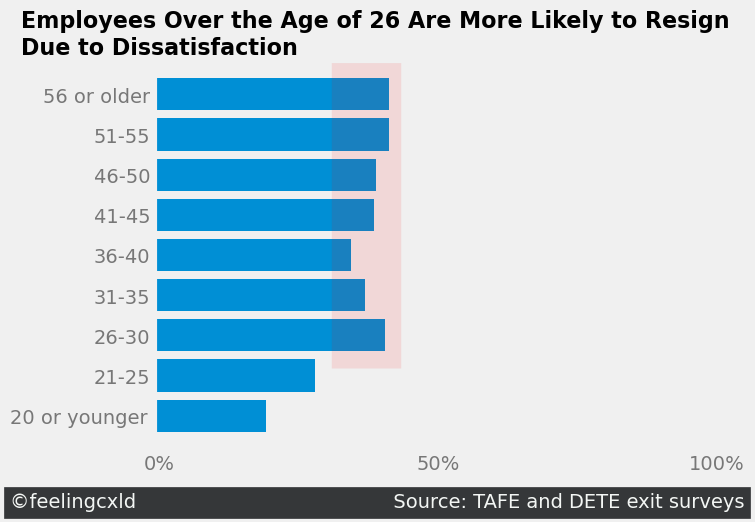

In [64]:
fig, ax = plt.subplots()
ax.barh(age_pivot.index, age_pivot['dissatisfied'])

# Title
ax.text(-0.24, 9, 'Employees Over the Age of 26 Are More Likely to Resign\nDue to Dissatisfaction',
        fontsize=16, fontweight='bold')

ax.grid(visible=False)

# x ticks
ax.set_xlim(0,1)

ax.set_xticklabels([])
ax.text(-0.02, -1.35, '0%', alpha=0.5)
ax.text(0.47, -1.35, '50%', alpha=0.5)
ax.text(0.96, -1.35, '100%', alpha=0.5)

# y ticks
ax.set_yticklabels([])
ax.text(-0.26, -0.2, '20 or younger', alpha=0.5)
ax.text(-0.2, 7.8, '56 or older', alpha=0.5)
# Place age from `21-25` to `51-55` on y ticks
for age, ycoord in zip(age_pivot.index[1:-1], range(1,8)):
    ax.text(-0.11, ycoord-0.2, age, alpha=0.5)

ax.axvline(0.38, ymin=0.21, color='red', linewidth=50, alpha=0.1)

# Watermark
ax.text(-0.26, -2.3, '©feelingcxld' + ' ' * 42 + 'Source: TAFE and DETE exit surveys',
        backgroundcolor='#353739', color='#f3f6f4')

plt.show()

In [65]:
# Store index value from `age_pivot` in `age` and value from `age_pivot` in `val`
# Return f-string with percentage of resignation due to dissatisfaction
for age, val in zip(age_pivot.index, age_pivot['dissatisfied']):
    print(f'Employees aged {age} resign due to dissatisfaction {val*100:.3}% of the time.')

# Calculate mean value from `age_pivot` values and print mean value in percentage
mean_age_dissatisfaction = age_pivot.mean()['dissatisfied']
print(f'The average percentage of resignments due to dissatisfaction is about {mean_age_dissatisfaction*100:.3}%')

Employees aged 20 or younger resign due to dissatisfaction 20.0% of the time.
Employees aged 21-25 resign due to dissatisfaction 28.8% of the time.
Employees aged 26-30 resign due to dissatisfaction 41.3% of the time.
Employees aged 31-35 resign due to dissatisfaction 37.7% of the time.
Employees aged 36-40 resign due to dissatisfaction 35.3% of the time.
Employees aged 41-45 resign due to dissatisfaction 39.3% of the time.
Employees aged 46-50 resign due to dissatisfaction 39.7% of the time.
Employees aged 51-55 resign due to dissatisfaction 42.0% of the time.
Employees aged 56 or older resign due to dissatisfaction 42.0% of the time.
The average percentage of resignments due to dissatisfaction is about 36.2%


We see that employees younger than 26 are less likely to resign due to dissatisfaction. As for employees over the age of 25, they are more likely to resign due to dissatisfaction.

## Exploring Resignations Separately for TAFE and DETE Institutes

### Resignations Due to Dissatisfaction by Career Stage TAFE

Let's start by exploring how length of service at the TAFE affect the reasons for resigning. 

In [66]:
# Calculate mean value of dissatisfied employees grouped by service category at the TAFE
tafe_service_cat_pivot = tafe_resigned_clean.pivot_table('dissatisfied', 'service_cat')

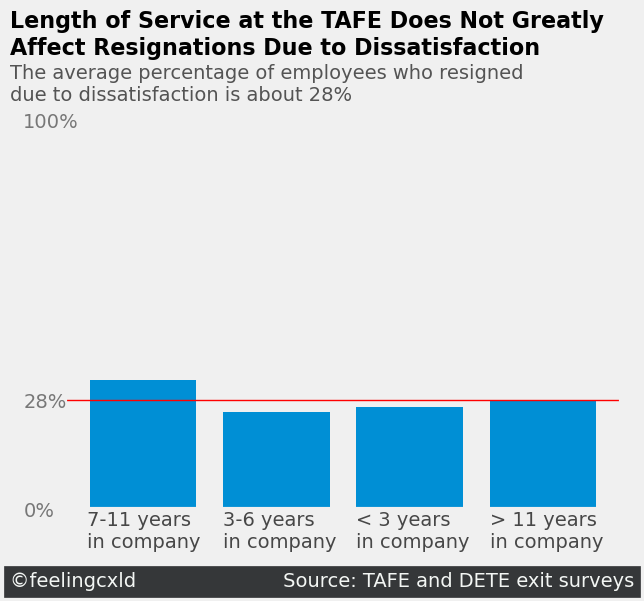

In [67]:
fig, ax = plt.subplots()
ax.bar(tafe_service_cat_pivot.index, tafe_service_cat_pivot['dissatisfied'])

# Title and subtitle
ax.text(-1, 1.17, 'Length of Service at the TAFE Does Not Greatly\nAffect Resignations Due to Dissatisfaction',
        fontsize=16, fontweight='bold')
ax.text(-1, 1.05, 'The average percentage of employees who resigned\ndue to dissatisfaction is about 28%',
        fontsize=14, alpha=0.65)

ax.grid(visible=False)

# y ticks
ax.set_ylim(0,1)

ax.set_yticklabels([])
ax.text(-0.9, -0.02, '0%', alpha=0.5)
ax.text(-0.9, 0.26, '28%', alpha=0.5)
ax.text(-0.9, 0.98, '100%', alpha=0.5)

# x ticks
ax.set_xticklabels([])
ax.text(-0.42, -0.1, '7-11 years\nin company', alpha=0.7)
ax.text(0.6, -0.1, '3-6 years\nin company', alpha=0.7)
ax.text(1.6, -0.1, '< 3 years\nin company', alpha=0.7)
ax.text(2.6, -0.1, '> 11 years\nin company', alpha=0.7)

ax.axhline(0.28, linewidth=1, color='red')

# Watermark
ax.text(-1, -0.2, '©feelingcxld' + ' ' * 24 + 'Source: TAFE and DETE exit surveys',
        backgroundcolor='#353739', color='#f3f6f4')

plt.show()

In [68]:
# Store index value from `tafe_service_cat_pivot` in `i` and value from `tafe_service_cat_pivot` in `val`
# Return f-string with percentage of resignation due to dissatisfaction
for i, val in zip(tafe_service_cat_pivot.index, tafe_service_cat_pivot['dissatisfied']):
    print(f'{val*100:.3}% of {i.lower()} employees at the TAFE resign due to dissatisfaction.')

# Calculate mean value from `tafe_service_cat_pivot` values and print mean value in percentage
tafe_mean_service_cat_dissatisfaction = tafe_service_cat_pivot.mean()['dissatisfied']
print(f'The average percentage of resignments due to dissatisfaction at the TAFE is about {tafe_mean_service_cat_dissatisfaction*100:.3}%')

33.3% of established employees at the TAFE resign due to dissatisfaction.
25.0% of experienced employees at the TAFE resign due to dissatisfaction.
26.3% of new employees at the TAFE resign due to dissatisfaction.
27.8% of veteran employees at the TAFE resign due to dissatisfaction.
The average percentage of resignments due to dissatisfaction at the TAFE is about 28.1%


Based on the graph above, we can say that the number of resignations due to dissatisfaction does not significantly vary depending on the length of service at the TAFE. We have slightly higher percentage of resignations due to dissatisfaction among employees who have worked at the TAFE for more than 6 years, but this percentage is not that significant.

### Resignations Due to Dissatisfaction by Age Group TAFE

Now let's explore how the reasons for resigning changes with age at the TAFE.

In [69]:
# Calculate mean value of dissatisfied employees grouped by service category
tafe_age_pivot = tafe_resigned_clean.pivot_table('dissatisfied', 'age')

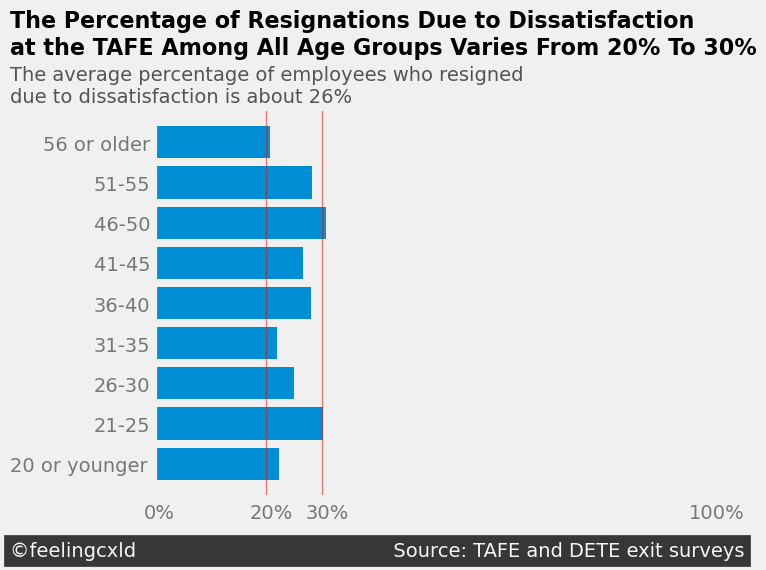

In [70]:
fig, ax = plt.subplots()
ax.barh(tafe_age_pivot.index, tafe_age_pivot['dissatisfied'])

# Title and subtitle
ax.text(-0.26, 10.2, 'The Percentage of Resignations Due to Dissatisfaction\nat the TAFE Among All Age Groups Varies From 20% To 30%',
        fontsize=16, fontweight='bold')
ax.text(-0.26, 9, 'The average percentage of employees who resigned\ndue to dissatisfaction is about 26%',
        fontsize=14, alpha=0.65)

ax.grid(visible=False)

# x ticks
ax.set_xlim(0,1)

ax.set_xticklabels([])
ax.text(-0.02, -1.35, '0%', alpha=0.5)
ax.text(0.17, -1.35, '20%', alpha=0.5)
ax.text(0.27, -1.35, '30%', alpha=0.5)
ax.text(0.96, -1.35, '100%', alpha=0.5)

# y ticks
ax.set_yticklabels([])
ax.text(-0.26, -0.2, '20 or younger', alpha=0.5)
ax.text(-0.2, 7.8, '56 or older', alpha=0.5)
# Place age from `21-25` to `51-55` on y ticks
for age, ycoord in zip(age_pivot.index[1:-1], range(1,8)):
    ax.text(-0.11, ycoord-0.2, age, alpha=0.5)

ax.axvline(0.2, color='red', linewidth=1, alpha=0.5)
ax.axvline(0.3,color='red', linewidth=1, alpha=0.5)

# Watermark
ax.text(-0.26, -2.3, '©feelingcxld' + ' ' * 42 + 'Source: TAFE and DETE exit surveys',
        backgroundcolor='#353739', color='#f3f6f4')

plt.show()

In [71]:
# Store index value from `tafe_age_pivot` in `age` and value from `tafe_age_pivot` in `val`
# Return f-string with percentage of resignation due to dissatisfaction
for age, val in zip(tafe_age_pivot.index, tafe_age_pivot['dissatisfied']):
    print(f'Employees at TAFE aged {age} resign due to dissatisfaction {val*100:.3}% of the time.')

# Calculate mean value from `tafe_age_pivot` values and print mean value in percentage
tafe_mean_age_dissatisfaction = tafe_age_pivot.mean()['dissatisfied']
print(f'The average percentage of resignments due to dissatisfaction at TAFE is about {tafe_mean_age_dissatisfaction*100:.3}%')

Employees at TAFE aged 20 or younger resign due to dissatisfaction 22.2% of the time.
Employees at TAFE aged 21-25 resign due to dissatisfaction 30.3% of the time.
Employees at TAFE aged 26-30 resign due to dissatisfaction 25.0% of the time.
Employees at TAFE aged 31-35 resign due to dissatisfaction 21.9% of the time.
Employees at TAFE aged 36-40 resign due to dissatisfaction 28.1% of the time.
Employees at TAFE aged 41-45 resign due to dissatisfaction 26.7% of the time.
Employees at TAFE aged 46-50 resign due to dissatisfaction 30.8% of the time.
Employees at TAFE aged 51-55 resign due to dissatisfaction 28.2% of the time.
Employees at TAFE aged 56 or older resign due to dissatisfaction 20.7% of the time.
The average percentage of resignments due to dissatisfaction at TAFE is about 26.0%


We can see that the percentage of resignations due to dissatisfaсtion at the TAFE among all age groups varies from 20% to 30%. The lower percentages have *20 or younger*, *31-35* and *56 or older* age groups. As for the highest percentages we have *21-25* and *41-45* age groups.

We can't say for sure whether young or old employees resign more often due to dissatisfaction, on average they are pretty close to each other.

### Resignations Due to Dissatisfaction by Career Stage DETE

Now let's explore the DETE dataset and find out how length of service here affects the reasons for resignations.

In [72]:
# Calculate mean value of dissatisfied employees grouped by service category at the DETE
dete_service_cat_pivot = dete_resigned_clean.pivot_table('dissatisfied', 'service_cat')

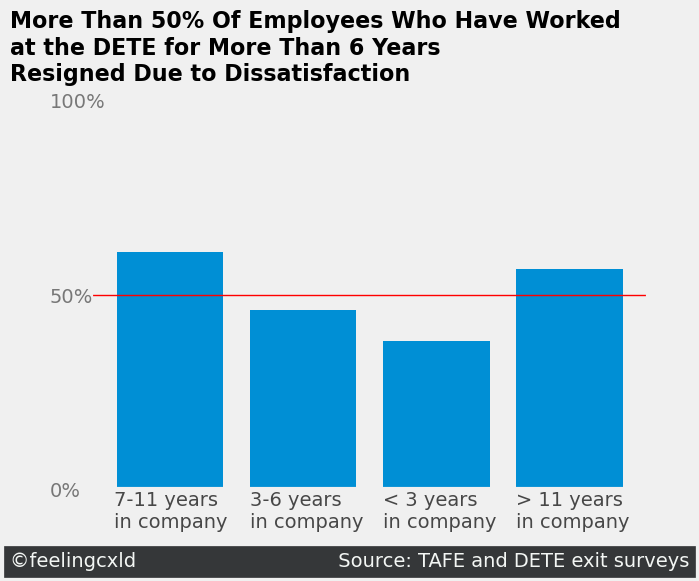

In [73]:
fig, ax = plt.subplots()
ax.bar(dete_service_cat_pivot.index, dete_service_cat_pivot['dissatisfied'])

# Title
ax.text(-1.2, 1.05, 'More Than 50% Of Employees Who Have Worked\nat the DETE for More Than 6 Years\nResigned Due to Dissatisfaction',
        fontsize=16, fontweight='bold')

ax.grid(visible=False)

# y ticks
ax.set_ylim(0,1)

ax.set_yticklabels([])
ax.text(-0.9, -0.02, '0%', alpha=0.5)
ax.text(-0.9, 0.48, '50%', alpha=0.5)
ax.text(-0.9, 0.98, '100%', alpha=0.5)

# x ticks
ax.set_xticklabels([])
ax.text(-0.42, -0.1, '7-11 years\nin company', alpha=0.7)
ax.text(0.6, -0.1, '3-6 years\nin company', alpha=0.7)
ax.text(1.6, -0.1, '< 3 years\nin company', alpha=0.7)
ax.text(2.6, -0.1, '> 11 years\nin company', alpha=0.7)

ax.axhline(0.5, linewidth=1, color='red')

# Watermark
ax.text(-1.2, -0.2, '©feelingcxld' + ' ' * 33 + 'Source: TAFE and DETE exit surveys',
        backgroundcolor='#353739', color='#f3f6f4')

plt.show()

In [74]:
# Store index value from `dete_service_cat_pivot` in `i` and value from `dete_service_cat_pivot` in `val`
# Return f-string with percentage of resignation due to dissatisfaction
for i, val in zip(dete_service_cat_pivot.index, dete_service_cat_pivot['dissatisfied']):
    print(f'{val*100:.3}% of {i.lower()} employees at the DETE resign due to dissatisfaction.')

# Calculate mean value from `dete_service_cat_pivot` values and print mean value in percentage
dete_mean_service_cat_dissatisfaction = dete_service_cat_pivot.mean()['dissatisfied']
print(f'The average percentage of resignments due to dissatisfaction at the DETE is about {dete_mean_service_cat_dissatisfaction*100:.3}%')

61.0% of established employees at the DETE resign due to dissatisfaction.
46.1% of experienced employees at the DETE resign due to dissatisfaction.
38.2% of new employees at the DETE resign due to dissatisfaction.
56.6% of veteran employees at the DETE resign due to dissatisfaction.
The average percentage of resignments due to dissatisfaction at the DETE is about 50.4%


We see that employees who had worked at the DETE for *7-11 years* resigned due to dissatisfaction in *61%* of cases. Employees who had worked at DETE for *more than 11 years* resigned due to dissatisfaction in *56.6%* of cases. Among employees who have worked for *less than 3 years*, this percentage is *38.2%*, and among those who have worked for *3-6 years*, it is *46.1%*.

Based on this chart, we can say that employees who have worked at the DETE longer are more likely to resign due to dissatisfaction.

### Resignations Due to Dissatisfaction by Age Group DETE

Next, we will examine how age affects the reasons for resignation at the DETE.

In [75]:
# Calculate mean value of dissatisfied employees grouped by age at the DETE
dete_age_pivot = dete_resigned_clean.pivot_table('dissatisfied', 'age')

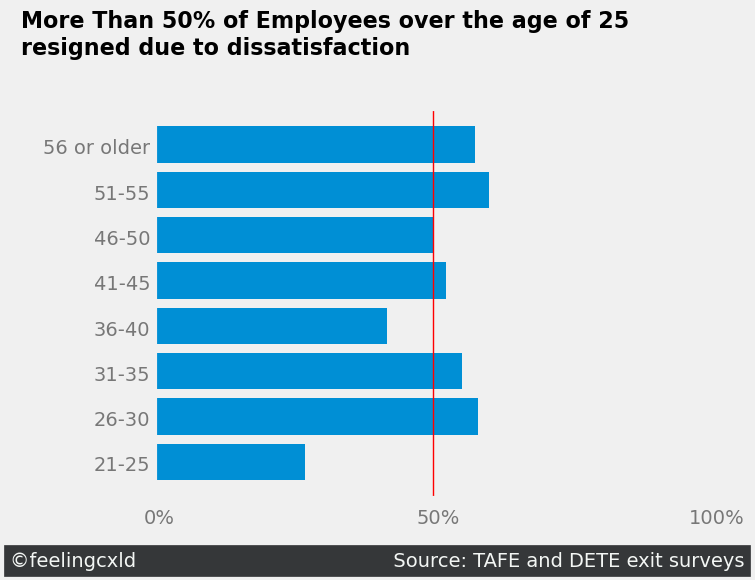

In [76]:
fig, ax = plt.subplots()
ax.barh(dete_age_pivot.index[1:], dete_age_pivot['dissatisfied'][1:])

# Title
ax.text(-0.24, 9, 'More Than 50% of Employees over the age of 25\nresigned due to dissatisfaction',
        fontsize=16, fontweight='bold')

ax.grid(visible=False)

# x ticks
ax.set_xlim(0,1)

ax.set_xticklabels([])
ax.text(-0.02, -1.35, '0%', alpha=0.5)
ax.text(0.47, -1.35, '50%', alpha=0.5)
ax.text(0.96, -1.35, '100%', alpha=0.5)

# y ticks
ax.set_yticklabels([])
ax.text(-0.2, 6.8, '56 or older', alpha=0.5)
# Place age from `21-25` to `51-55` on y ticks
for age, ycoord in zip(age_pivot.index[1:-1], range(0,7)):
    ax.text(-0.11, ycoord-0.2, age, alpha=0.5)


ax.axvline(0.5, color='red', linewidth=1)

# Watermark
ax.text(-0.26, -2.3, '©feelingcxld' + ' ' * 42 + 'Source: TAFE and DETE exit surveys',
        backgroundcolor='#353739', color='#f3f6f4')

plt.show()

In [77]:
# Store index value from `dete_age_pivot` in `age` and value from `tafe_age_pivot` in `val`
# Return f-string with percentage of resignation due to dissatisfaction
for age, val in zip(dete_age_pivot.index, dete_age_pivot['dissatisfied']):
    print(f'Employees at DETE aged {age} resign due to dissatisfaction {val*100:.3}% of the time.')

# Calculate mean value from `dete_age_pivot` values and print mean value in percentage
dete_mean_age_dissatisfaction = dete_age_pivot.mean()['dissatisfied']
print(f'The average percentage of resignments due to dissatisfaction at DETE is about {dete_mean_age_dissatisfaction*100:.3}%')

Employees at DETE aged 20 or younger resign due to dissatisfaction 0.0% of the time.
Employees at DETE aged 21-25 resign due to dissatisfaction 26.9% of the time.
Employees at DETE aged 26-30 resign due to dissatisfaction 58.1% of the time.
Employees at DETE aged 31-35 resign due to dissatisfaction 55.2% of the time.
Employees at DETE aged 36-40 resign due to dissatisfaction 41.7% of the time.
Employees at DETE aged 41-45 resign due to dissatisfaction 52.3% of the time.
Employees at DETE aged 46-50 resign due to dissatisfaction 50.0% of the time.
Employees at DETE aged 51-55 resign due to dissatisfaction 60.0% of the time.
Employees at DETE aged 56 or older resign due to dissatisfaction 57.5% of the time.
The average percentage of resignments due to dissatisfaction at DETE is about 44.6%


This chart shows that employees ages *26-35*, *41-45*, and *51 and older* resigned due to dissatisfaction *more than 50%* of the time. Employees aged *46-50* resigned due to dissatisfaction *50%* of the time. Employees aged *36-40* resigned due to dissatisfaction *41.7%* of the time. As for younger employees aged *21-25*, the percentage of resignations due to dissatisfaction is about *26.9%*.

We do not include the *20 and younger* age group in the chart above because there is only one entry in this age group from the entire data set.

Based on this research, we can say that younger employees are less likely to resign due to dissatisfaction compared to older employees.

<a id='conclusion'></a>
# Conclusion

In this research we had two questions that we wanted to answer. The fisrt was 'Are employees who only work for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?'. The second was 'Are younger employees resigning due to some kind of dissatisfaction? What about older employees?'. In the end, we found that people who have worked in the institutes for a long time, as well as older people, are more likely to resign due to dissatisfaction.

We also examined these data sets separately and found that in the TAFE, age and length of service did not significantly affect resignations due to dissatisfaction. At the DETE, the picture is different. Not only is the percentage of resignations due to dissatisfaction higher there, but age and length of service also have a strong influence. At the DETE older people and people who have worked here more than 6 years are more likely to resign due to dissatisfaction.